# Team FIFA

---

You are working for an advertising analytics consulting company.  Your client, a name brand television network, needs help deciding how to re-formulate the pricing structure for new customers, but also incentivize existing clients to convert to new partnerships sponsors for teams and players.

**Goals:**
- Determine a reasonable metric to decide how exciting a game is
    - Engineer this feature using existing data
- Suggest a pricing structure tied to the overall value associated with "game excitement"

**Presentation requirements:**
- At least 50% of presentation must address a non-technical audience
- Someone who hasn't presented in class yet must take lead on presentation

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

%matplotlib inline

df = pd.read_csv("./datasets/fifa_goals.csv", encoding='utf-8')

In [133]:
df.head()

,minute,player,team1score,team2score
game_id,,,,
1,18,Schiavio,1,0
1,20,Orsi,2,0
1,29,Schiavio,3,0
1,57,Donelli,3,1
1,63,Ferrari,4,1


In [134]:
df.describe()

,team1score,team2score
count,2207.000000,2207.000000
mean,1.754418,0.849570
std,1.486246,0.914291
min,0.000000,0.000000
25%,1.000000,0.000000
50%,1.000000,1.000000
75%,2.000000,1.000000
max,9.000000,7.000000


In [5]:
# df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2207 entries, 0 to 2206
Data columns (total 5 columns):
game_id       2207 non-null int64
minute        2207 non-null object
player        2207 non-null object
team1score    2207 non-null int64
team2score    2207 non-null int64
dtypes: int64(3), object(2)
memory usage: 86.3+ KB


In [19]:
if df.minute.dtype != 'int64':
    df.loc[df.minute == '45+', 'minute'] = 45
    df.loc[df.minute == '90+', 'minute'] = 90
    df.loc[df.minute == '120+', 'minute'] = 121
    df.minute = pd.to_numeric(df.minute)

df['half'] = [1 if m <= 45 else 2 if m > 45 and m <= 90 else 3 for m in df.minute]
df['minute_half'] = df.minute - (df.half - 1) * 45

In [20]:
# goal diff lower higher ecxintnig
# higher goals higher exciting
# higher the minute higher exicting
# total goals
df['goal_diff'] = np.abs(df.team1score - df.team2score)
df['excitement_per_goal'] =  np.exp(df.minute_half/45) / (df.goal_diff + 1) * df.half
# df.excitement_per_goal.groupby(df.game_id).sum().sort_values(ascending=False).head()
df_exct = df.groupby(df.game_id)
df_exct_total = df_exct.exciting_per_goal.sum()

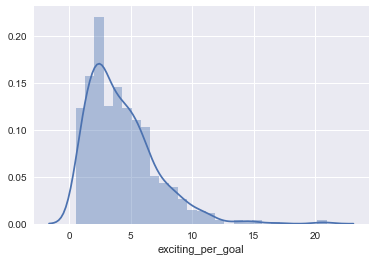

In [21]:
sns.distplot(df_exct_total)

In [22]:
best_goals_ids = df_exct.excitement_per_goal.sum().sort_values(ascending=False).index

In [25]:
df[df.game_id == best_goals_ids[0]][['team1score', 'team2score', 'minute', 'excitement_per_goal']]

,team1score,team2score,minute,excitement_per_goal
654,1,0,18,0.745912
655,1,1,23,1.667143
656,2,1,25,0.871454
657,3,1,44,0.886181
658,3,2,53,1.194560
659,3,3,59,2.729882
660,4,3,71,1.782074
661,4,4,89,5.317084
662,5,4,93,1.603409
663,6,4,104,1.364941


In [24]:
df.groupby(df.player).excitement_per_goal.sum().sort_values(ascending=False).head(10)

player
MÃ¼ller       27.352201
Seeler        19.285283
Fontaine      16.720669
Ronaldo       16.536395
Rahn          16.184527
Klose         15.139057
Klinsmann     13.885234
LeÃ´nidas     13.020483
HernÃ¡ndez    12.686314
Lato          12.581007
Name: excitement_per_goal, dtype: float64